# **Advertising Campaigns - Customer Segment, CTR, Conversion Rate Analysis**

## **Overview:**
### In this project, I will answer the questions:
* What are the distributions of age, gender, click-through-rate?
* Which customer segmentations that companies should consider (by CTR and Conversion Rate)?
* Which campaigns that give crucial outcomes?

### Dataset:

The data used in this project is from an anonymous organisation’s social media ad campaign. The file conversion_data.csv contains 1143 observations in 11 variables. Below are the descriptions of the variables.

1.) ad_id: an unique ID for each ad.

2.) xyz_campaign_id: an ID associated with each ad campaign of XYZ company.

3.) fb_campaign_id: an ID associated with how Facebook tracks each campaign.

4.) age: age of the person to whom the ad is shown.

5.) gender: gender of the person to whim the add is shown.

6.) interest: a code specifying the category to which the person’s interest belongs (interests are as mentioned in the person’s Facebook public profile).

7.) Impressions: the number of times the ad was shown.

8.) Clicks: number of clicks on for that ad.

9.) Spent: Amount paid by company xyz to Facebook, to show that ad.

10.) Total conversion: Total number of people who enquired about the product after seeing the ad.

11.) Approved conversion: Total number of people who bought the product after seeing the ad.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
df = pd.read_csv('KAG_conversion_data.csv')

## **I. Data Prepare**

In [34]:
df.head(10)

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1
5,708820,916,103929,30-34,M,29,1915,0,0.00,1,1
6,708889,916,103940,30-34,M,15,15615,3,4.77,1,0
7,708895,916,103941,30-34,M,16,10951,1,1.27,1,1
8,708953,916,103951,30-34,M,27,2355,1,1.50,1,0
9,708958,916,103952,30-34,M,28,9502,3,3.16,1,0


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [36]:
df = df.rename(columns = {'xyz_campaign_id':'company_id', 
                          'Impressions':'impr', 
                          'Clicks':'clicks', 
                          'Spent':'spent', 
                          'Total_Conversion':'total_conv', 
                          'Approved_Conversion':'apprv_conv'})

In [37]:
df['CTR'] = round(100*df.clicks/df.impr,4)
df['conv_rate'] = round(100*df.apprv_conv/df.clicks,2)

In [38]:
df['conv_rate'].fillna(0, inplace=True)
df['conv_rate'].replace([np.inf, -np.inf], 0, inplace=True)

In [39]:
df.head()

,ad_id,company_id,fb_campaign_id,age,gender,interest,impr,clicks,spent,total_conv,apprv_conv,CTR,conv_rate
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,0.0136,100.0
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0.0112,0.0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0.0000,0.0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0.0235,0.0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,0.0242,100.0


## **II. Data Exloring**

### There are **three different companies** in this dataset, and here are the **corresponding numbers of ads and FB campaigns** for each:
    - Company 916 : 54 ads & 47 FB campaigns
    
    - Company 936 : 464 ads & 367 FB campaigns
    
    - Company 1178 : 625 ads & 277 FB campaigns

In [40]:
 df.groupby('company_id')[['ad_id','fb_campaign_id']].nunique()

,ad_id,fb_campaign_id
company_id,,
916,54,47
936,464,367
1178,625,277


In [41]:
comp_916 = df[df['company_id'] == 916]
comp_936 = df[df['company_id'] == 936]
comp_1178 = df[df['company_id'] == 1178]

#### I will explore those **three companies separately** to gain proper insights.

### **Age distributions**:
#### - Campaigns from **all three companies** reach the most people around the ages of **30-34**.

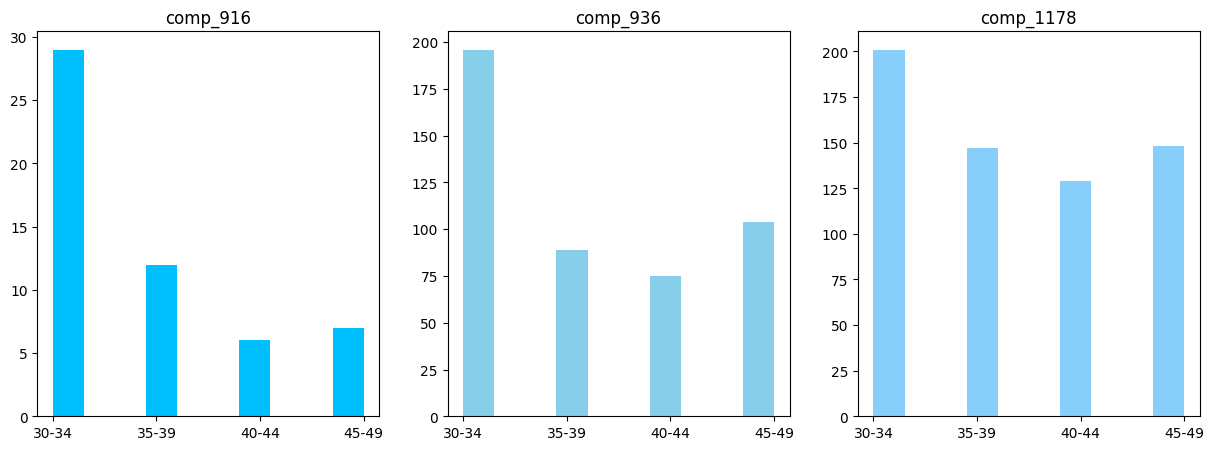

In [42]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(comp_916['age'], color = 'deepskyblue')
axes[0].set_title('comp_916')

axes[1].hist(comp_936['age'], color = 'skyblue')
axes[1].set_title('comp_936')

axes[2].hist(comp_1178['age'], color = 'lightskyblue')
axes[2].set_title('comp_1178')

plt.show()

### **Gender distributions**:
#### - Products from **Company916 and Company1178** are predominantly marketed towards **men**.
#### - Whereas those from **Company936** are targeted towards **women**.

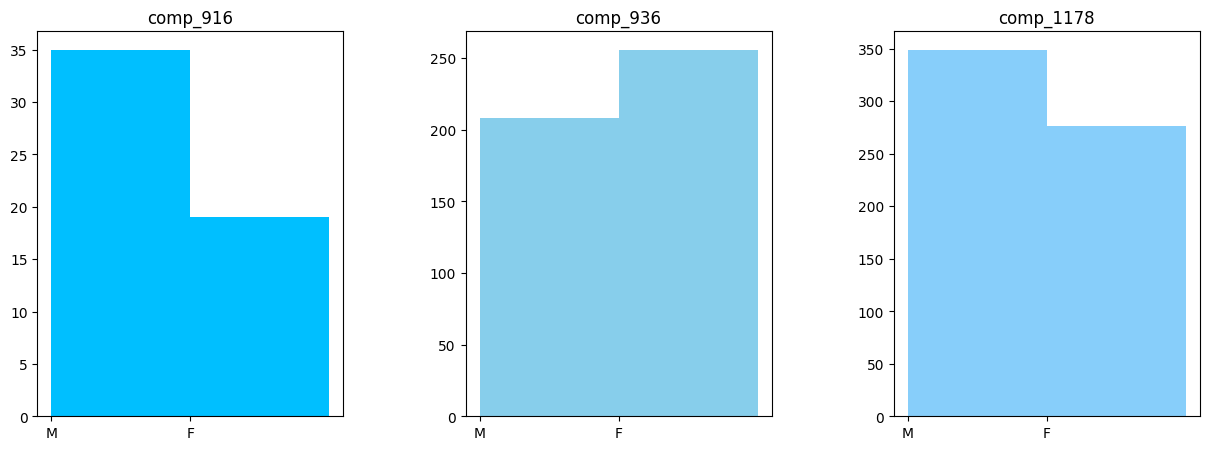

In [43]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(comp_916['gender'], color = 'deepskyblue', bins=2, range=(0, 2))
axes[0].set_title('comp_916')

axes[1].hist(comp_936['gender'], color = 'skyblue', bins=2, range=(0, 2))
axes[1].set_title('comp_936')

axes[2].hist(comp_1178['gender'], color = 'lightskyblue', bins=2, range=(0, 2))
axes[2].set_title('comp_1178')

plt.subplots_adjust(wspace=0.4)

plt.show()

### When it comes to **Click-through-rate (CTR)**:
#### - While the CTRs of **Company916 and Company936** are mostly **lower than 0.01%**.
#### - Those of **Company1178** range **from 0.0125% to 0.02%**.

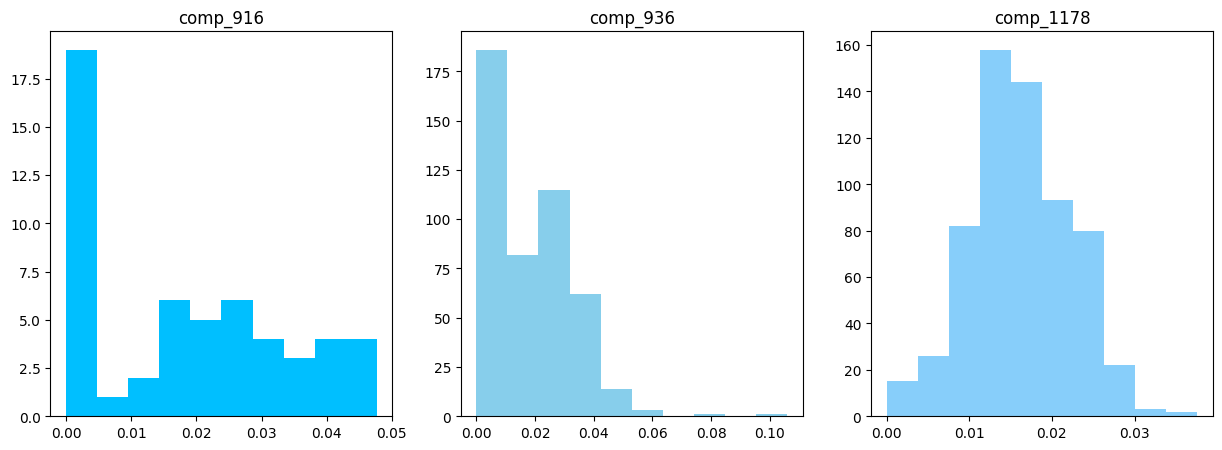

In [44]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].hist(comp_916['CTR'], color = 'deepskyblue')
axes[0].set_title('comp_916')

axes[1].hist(comp_936['CTR'], color = 'skyblue')
axes[1].set_title('comp_936')

axes[2].hist(comp_1178['CTR'], color = 'lightskyblue')
axes[2].set_title('comp_1178')

plt.show()

### The **customer segmentations** that attribute **the highest average CTR** to each company are:
#### - Company916: Male from 45-49 & Female from 35-39.
#### - Company936: Female from 45-49 & Male and Female from 40-44.
#### - Company1178: Female from 35-49.

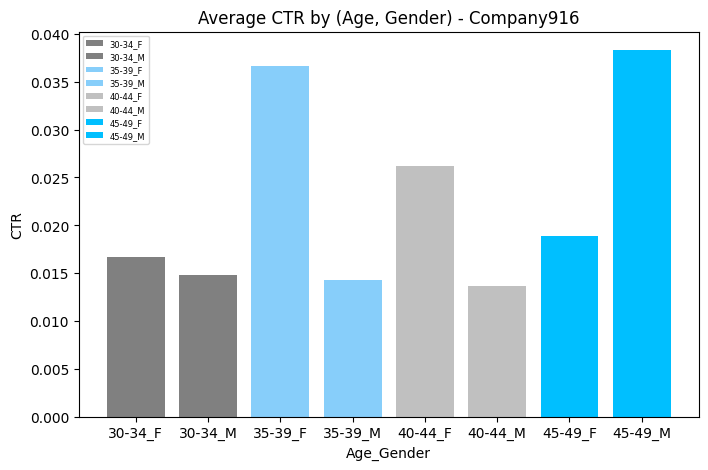

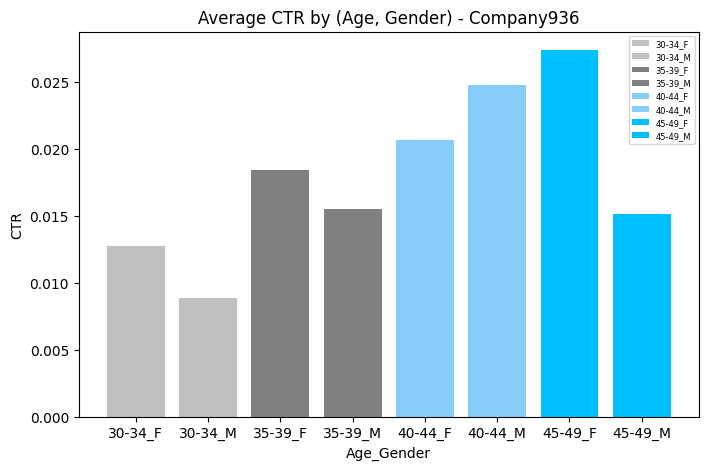

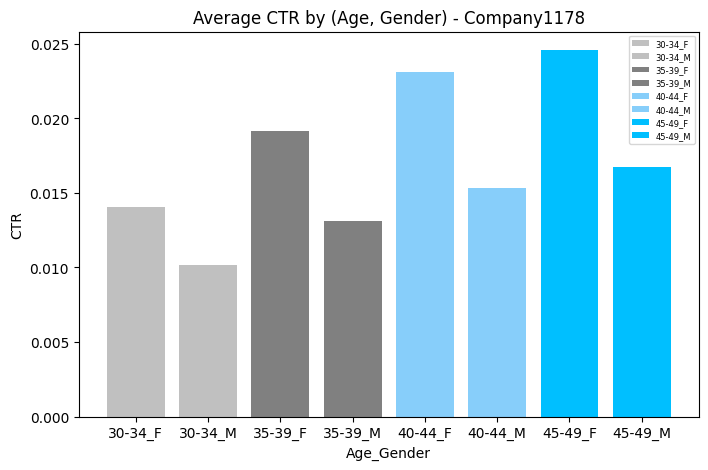

In [45]:
avg_ctr = comp_916.groupby(['age', 'gender'])['CTR'].mean()
fig, ax = plt.subplots(figsize=(8, 5))
age_colors = {'30-34': 'gray', '35-39': 'lightskyblue', '40-44': 'silver', '45-49': 'deepskyblue'}
for (age, gender), values in avg_ctr.groupby(level=[0, 1]):
    ax.bar([f'{age}_{gender}'] * len(values), values.values, color=age_colors[age], label=f'{age}_{gender}')
ax.set_xlabel('Age_Gender')
ax.set_ylabel('CTR')
ax.set_title('Average CTR by (Age, Gender) - Company916')
ax.legend(fontsize=6)

avg_ctr = comp_936.groupby(['age', 'gender'])['CTR'].mean()
fig, ax = plt.subplots(figsize=(8, 5))
age_colors = {'30-34': 'silver', '35-39': 'gray', '40-44': 'lightskyblue', '45-49': 'deepskyblue'}
for (age, gender), values in avg_ctr.groupby(level=[0, 1]):
    ax.bar([f'{age}_{gender}'] * len(values), values.values, color=age_colors[age], label=f'{age}_{gender}')
ax.set_xlabel('Age_Gender')
ax.set_ylabel('CTR')
ax.set_title('Average CTR by (Age, Gender) - Company936')
ax.legend(fontsize=6)

avg_ctr = comp_1178.groupby(['age', 'gender'])['CTR'].mean()
fig, ax = plt.subplots(figsize=(8, 5))
age_colors = {'30-34': 'silver', '35-39': 'gray', '40-44': 'lightskyblue', '45-49': 'deepskyblue'}
for (age, gender), values in avg_ctr.groupby(level=[0, 1]):
    ax.bar([f'{age}_{gender}'] * len(values), values.values, color=age_colors[age], label=f'{age}_{gender}')
ax.set_xlabel('Age_Gender')
ax.set_ylabel('CTR')
ax.set_title('Average CTR by (Age, Gender) - Company1178')
ax.legend(fontsize=6)

plt.show()

### The **customer segmentations** that attribute **the highest average Conversion Rate** to each company are:
#### - Company916: Female from 40-44.
#### - Company936: Female from 30-44 & Male from 40-44.
#### - Company1178: Male and Female from 30-34.

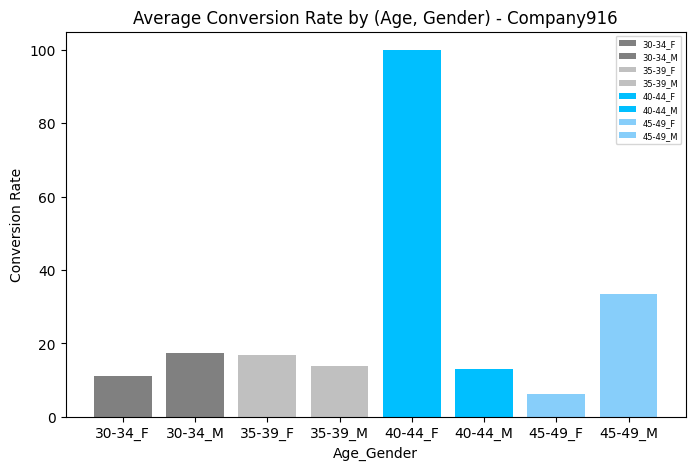

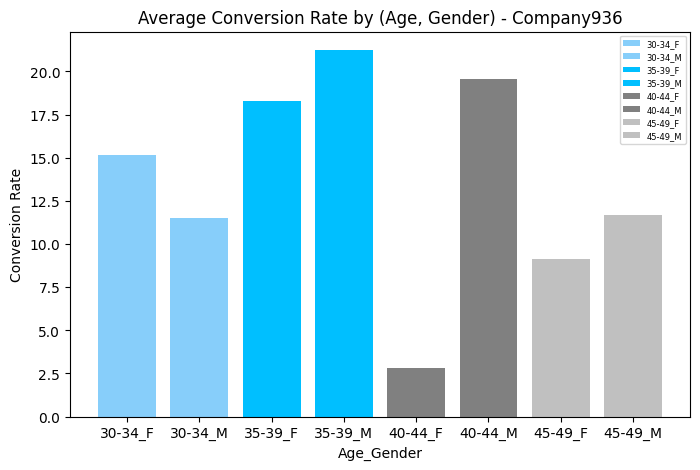

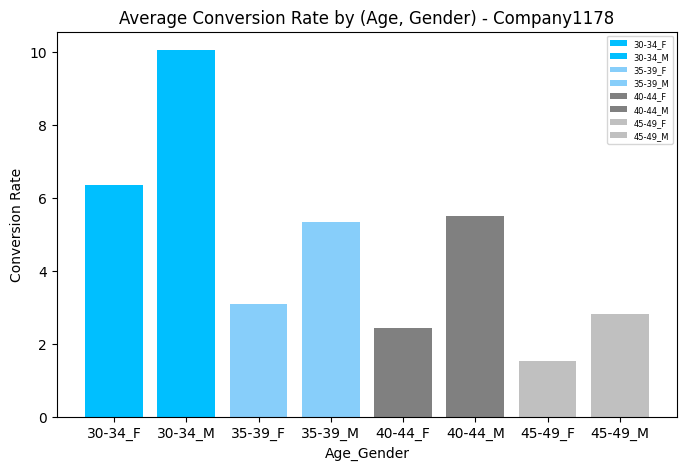

In [46]:
avg_conv_rate = comp_916.groupby(['age', 'gender'])['conv_rate'].mean()
fig, ax = plt.subplots(figsize=(8, 5))
age_colors = {'30-34': 'gray', '35-39': 'silver', '40-44': 'deepskyblue', '45-49': 'lightskyblue'}
for (age, gender), values in avg_conv_rate.groupby(level=[0, 1]):
    ax.bar([f'{age}_{gender}'] * len(values), values.values, color=age_colors[age], label=f'{age}_{gender}')
ax.set_xlabel('Age_Gender')
ax.set_ylabel('Conversion Rate')
ax.set_title('Average Conversion Rate by (Age, Gender) - Company916')
ax.legend(fontsize=6)

avg_conv_rate = comp_936.groupby(['age', 'gender'])['conv_rate'].mean()
fig, ax = plt.subplots(figsize=(8, 5))
age_colors = {'30-34': 'lightskyblue', '35-39': 'deepskyblue', '40-44': 'gray', '45-49': 'silver'}
for (age, gender), values in avg_conv_rate.groupby(level=[0, 1]):
    ax.bar([f'{age}_{gender}'] * len(values), values.values, color=age_colors[age], label=f'{age}_{gender}')
ax.set_xlabel('Age_Gender')
ax.set_ylabel('Conversion Rate')
ax.set_title('Average Conversion Rate by (Age, Gender) - Company936')
ax.legend(fontsize=6)

avg_conv_rate = comp_1178.groupby(['age', 'gender'])['conv_rate'].mean()
fig, ax = plt.subplots(figsize=(8, 5))
age_colors = {'30-34': 'deepskyblue', '35-39': 'lightskyblue', '40-44': 'gray', '45-49': 'silver'}
for (age, gender), values in avg_conv_rate.groupby(level=[0, 1]):
    ax.bar([f'{age}_{gender}'] * len(values), values.values, color=age_colors[age], label=f'{age}_{gender}')
ax.set_xlabel('Age_Gender')
ax.set_ylabel('Conversion Rate')
ax.set_title('Average Conversion Rate by (Age, Gender) - Company1178')
ax.legend(fontsize=6)

plt.show()

### The **Facebook Ad Campaigns** that attribute **the highest average Conversion Rate** to each company are shown as below:

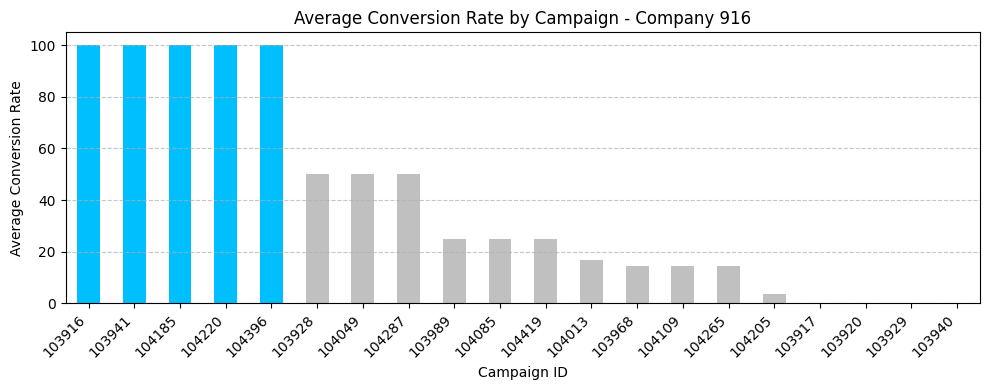

In [47]:
conversion_rate_by_campaign = comp_916.groupby('fb_campaign_id')['conv_rate'].mean().nlargest(20)
colors = ['deepskyblue' if rate > 60 else 'silver' for rate in conversion_rate_by_campaign]
plt.figure(figsize=(10, 4))
conversion_rate_by_campaign.plot(kind='bar', color=colors)
plt.title('Average Conversion Rate by Campaign - Company 916')
plt.xlabel('Campaign ID')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

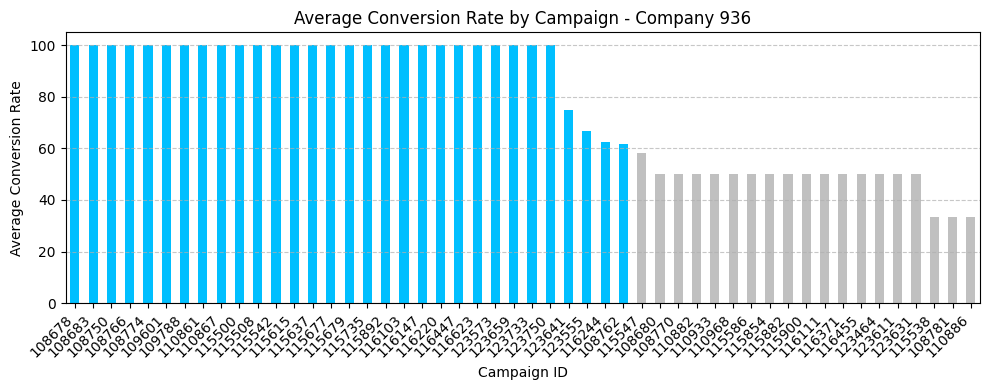

In [48]:
conversion_rate_by_campaign = comp_936.groupby('fb_campaign_id')['conv_rate'].mean().nlargest(50)
colors = ['deepskyblue' if rate > 60 else 'silver' for rate in conversion_rate_by_campaign]
plt.figure(figsize=(10, 4))
conversion_rate_by_campaign.plot(kind='bar', color=colors)
plt.title('Average Conversion Rate by Campaign - Company 936')
plt.xlabel('Campaign ID')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

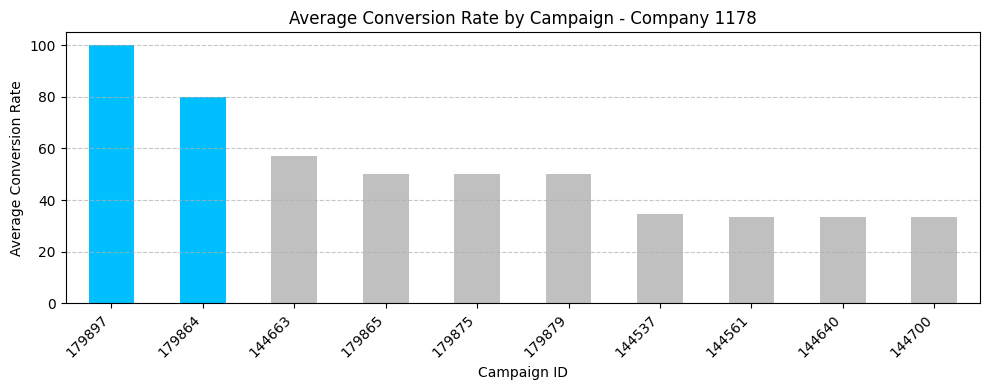

In [49]:
conversion_rate_by_campaign = comp_1178.groupby('fb_campaign_id')['conv_rate'].mean().nlargest(10)
colors = ['deepskyblue' if rate > 60 else 'silver' for rate in conversion_rate_by_campaign]
plt.figure(figsize=(10, 4))
conversion_rate_by_campaign.plot(kind='bar', color=colors)
plt.title('Average Conversion Rate by Campaign - Company 1178')
plt.xlabel('Campaign ID')
plt.ylabel('Average Conversion Rate')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()